In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

2024-07-03 06:47:19.550317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 06:47:19.708349: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-03 06:47:19.713454: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /sw/eb/sw/Perl/5.32.0-GCCcore-10.2.0/lib:/sw/eb/sw/DB/18.1.40-GCCcore-10.2.0/lib:/s

Check out the Jupyter notebook for Chapter 2 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb. Then:

1) For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the size of the first layer (namely, the number of neurons in the first layer) as: 16, 32, 64, 128, 256, 512. For each size, train the neural network and record its test accuracy (namely, accuracy on the test set). Draw a figure, where the x-axis is the size of the first layer, and the y-axis is the test accuracy. Submit your figure.

2024-07-03 06:47:34.887634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /sw/eb/sw/Perl/5.32.0-GCCcore-10.2.0/lib:/sw/eb/sw/DB/18.1.40-GCCcore-10.2.0/lib:/sw/eb/sw/gettext/0.21-GCCcore-10.2.0/lib:/sw/eb/sw/libxml2/2.9.10-GCCcore-10.2.0/lib:/sw/eb/sw/expat/2.2.9-GCCcore-10.2.0/lib:/sw/eb/sw/cURL/7.72.0-GCCcore-10.2.0/lib:/sw/eb/sw/Python/3.8.6-GCCcore-10.2.0/lib:/sw/eb/sw/libffi/3.3-GCCcore-10.2.0/lib64:/sw/eb/sw/libffi/3.3-GCCcore-10.2.0/lib:/sw/eb/sw/GMP/6.2.0-GCCcore-10.2.0/lib:/sw/eb/sw/XZ/5.2.5-GCCcore-10.2.0/lib:/sw/eb/sw/SQLite/3.33.0-GCCcore-10.2.0/lib:/sw/eb/sw/Tcl/8.6.10-GCCcore-10.2.0/lib:/sw/eb/sw/libreadline/8.0-GCCcore-10.2.0/lib:/sw/eb/sw/ncurses/6.2-GCCcore-10.2.0/lib:/sw/eb/sw/bzip2/1.0.8-GCCcore-10.2.0/lib:/sw/eb/sw/binutils/2.35-GCCcore-10.2.0/lib:/sw/eb/sw/zlib/1.2.11-GCCcore-10.2.0

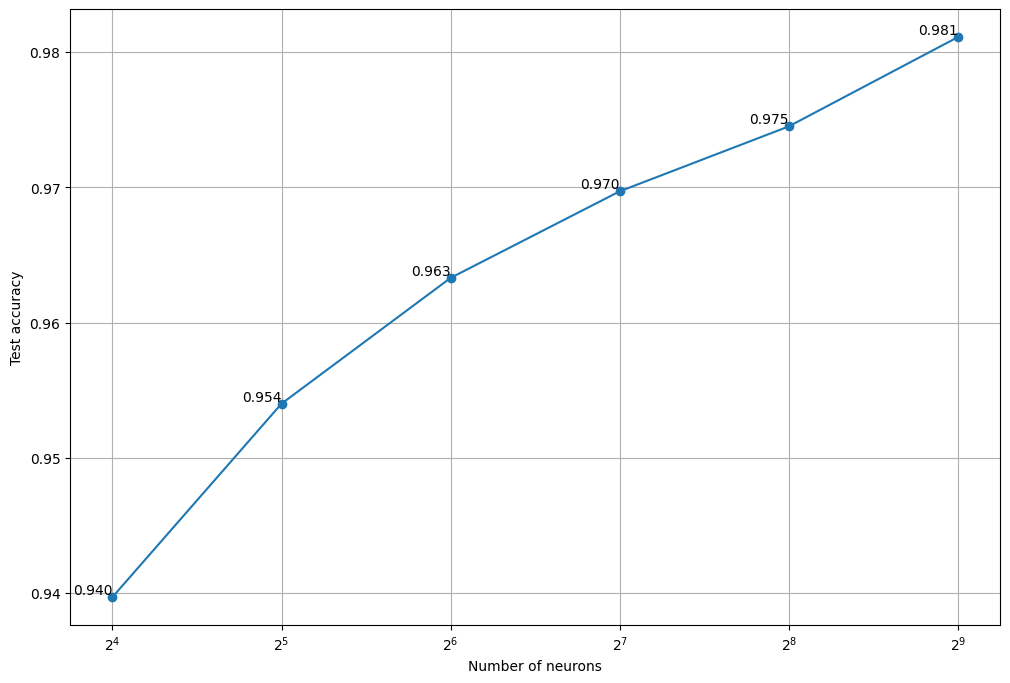

In [2]:
test_accs = []
for neurons in [16, 32, 64, 128, 256, 512]:
    model = keras.Sequential(
        [
            layers.Dense(neurons, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype("float32") / 255

    model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
    model.predict(test_images[0:10], verbose=0)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    test_accs.append(test_acc)

plt.figure(figsize=(12, 8))
plt.plot([16, 32, 64, 128, 256, 512], test_accs, marker="o")
plt.xlabel("Number of neurons")
plt.ylabel("Test accuracy")
plt.xscale("log", base=2)
plt.grid()

# Add the accuracy values on top of the markers
for x, acc in zip([16, 32, 64, 128, 256, 512], test_accs):
    plt.text(x, acc, f"{acc:.3f}", ha="right", va="bottom")

plt.savefig("mnist_neurons.svg", format="svg", dpi=300)

plt.show()

2) For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the number of layers to be: 2, 3, 4, 5. (The last layer has to have size 10 since we have 10 classes. But you can decide on the sizes of the other layers.) For each case, train the neural network and record its test accuracy. Draw a figure, where the x-axis is the number of layers, and the y-axis is the test accuracy. Submit your figure, and specify the sizes of your layers for each case.

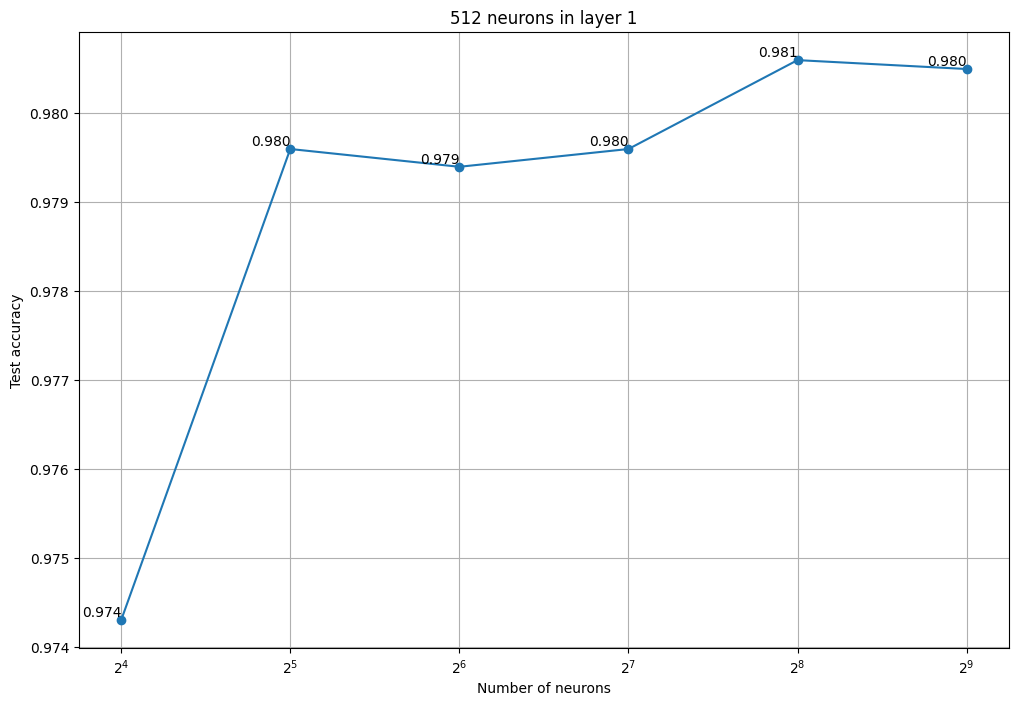

In [7]:
for neurons_layer_1 in [512]:
    test_accs = []
    for neurons_layer_2 in [16, 32, 64, 128, 256, 512]:
        model = keras.Sequential(
            [
                layers.Dense(neurons_layer_1, activation="relu"),
                layers.Dense(neurons_layer_2, activation="relu"),
                layers.Dense(10, activation="softmax"),
            ]
        )

        model.compile(
            optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

        train_images = train_images.reshape((60000, 28 * 28))
        train_images = train_images.astype("float32") / 255
        test_images = test_images.reshape((10000, 28 * 28))
        test_images = test_images.astype("float32") / 255

        model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
        model.predict(test_images[0:10], verbose=0)

        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
        test_accs.append(test_acc)

    plt.figure(figsize=(12, 8))
    plt.plot([16, 32, 64, 128, 256, 512], test_accs, marker="o")
    plt.title(f"{neurons_layer_1} neurons in layer 1")
    plt.xlabel("Number of neurons")
    plt.ylabel("Test accuracy")
    plt.xscale("log", base=2)
    plt.grid()

    # Add the accuracy values on top of the markers
    for x, acc in zip([16, 32, 64, 128, 256, 512], test_accs):
        plt.text(x, acc, f"{acc:.3f}", ha="right", va="bottom")

    plt.savefig(f"mnist_neurons_layer_1_{neurons_layer_1}.svg", format="svg", dpi=300)

    plt.show()

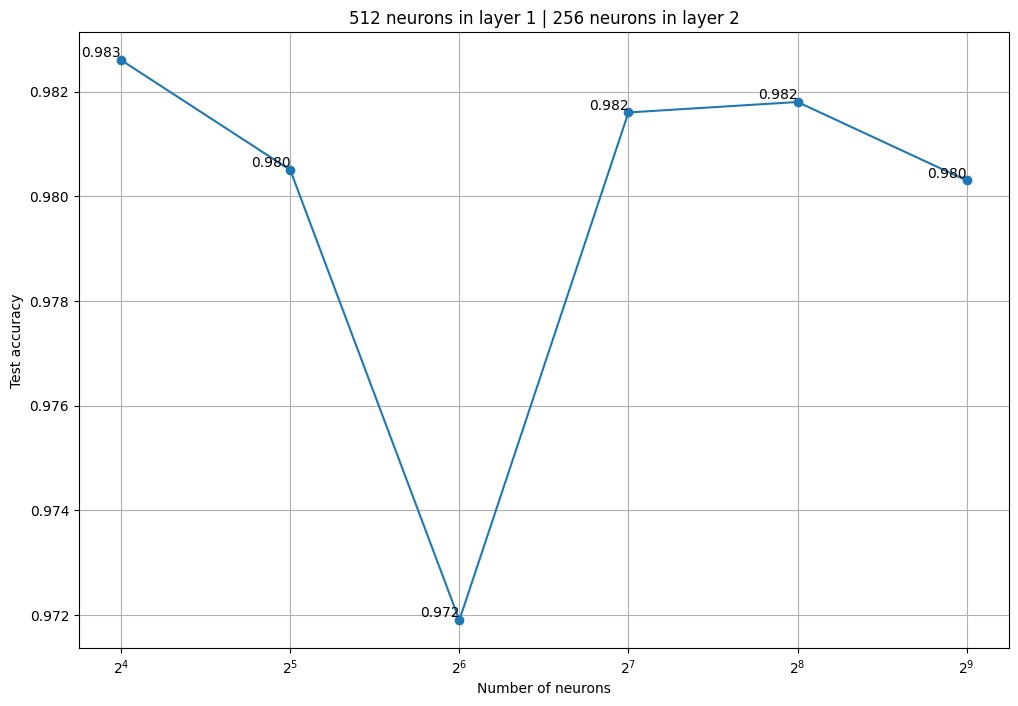

In [8]:
for neurons_layer_1 in [512]:
    for neurons_layer_2 in [256]:
        test_accs = []
        for neurons_layer_3 in [16, 32, 64, 128, 256, 512]:
            model = keras.Sequential(
                [
                    layers.Dense(neurons_layer_1, activation="relu"),
                    layers.Dense(neurons_layer_2, activation="relu"),
                    layers.Dense(neurons_layer_3, activation="relu"),
                    layers.Dense(10, activation="softmax"),
                ]
            )

            model.compile(
                optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
            )

            (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

            train_images = train_images.reshape((60000, 28 * 28))
            train_images = train_images.astype("float32") / 255
            test_images = test_images.reshape((10000, 28 * 28))
            test_images = test_images.astype("float32") / 255

            model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
            model.predict(test_images[0:10], verbose=0)

            test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
            test_accs.append(test_acc)

        plt.figure(figsize=(12, 8))
        plt.plot([16, 32, 64, 128, 256, 512], test_accs, marker="o")
        plt.title(
            f"{neurons_layer_1} neurons in layer 1 | {neurons_layer_2} neurons in layer 2"
        )
        plt.xlabel("Number of neurons")
        plt.ylabel("Test accuracy")
        plt.xscale("log", base=2)
        plt.grid()

        # Add the accuracy values on top of the markers
        for x, acc in zip([16, 32, 64, 128, 256, 512], test_accs):
            plt.text(x, acc, f"{acc:.3f}", ha="right", va="bottom")

        plt.savefig(
            f"mnist_neurons_layer_1_{neurons_layer_1}_layer_2_{neurons_layer_2}.svg",
            format="svg",
            dpi=300,
        )

        plt.show()

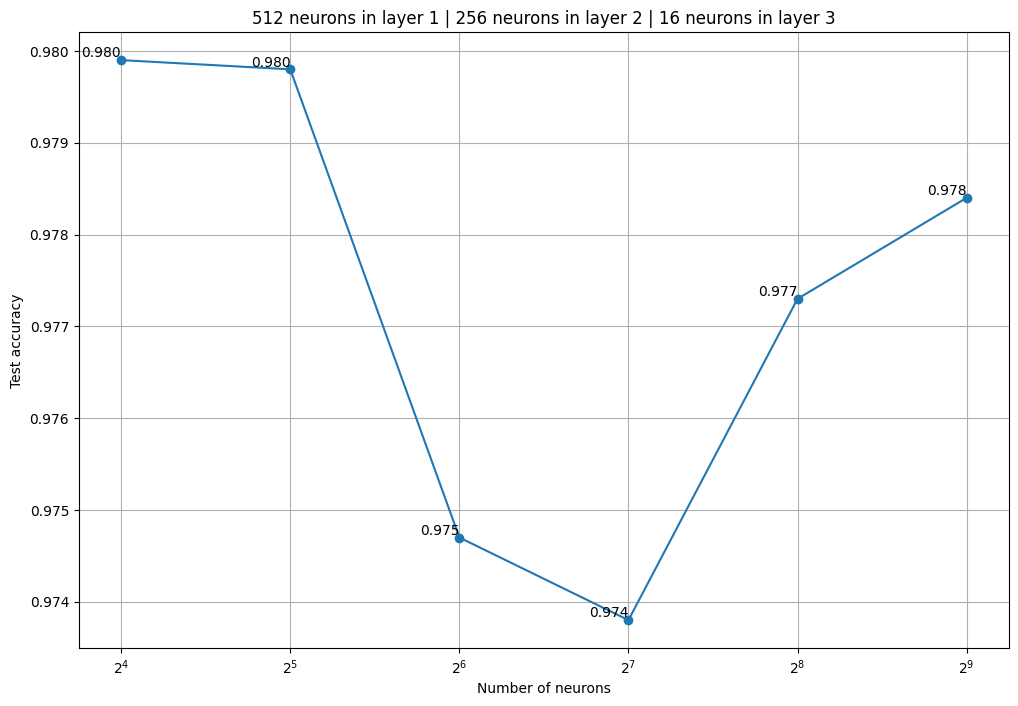

In [9]:
for neurons_layer_1 in [512]:
    for neurons_layer_2 in [256]:
        for neurons_layer_3 in [16]:
            test_accs = []
            for neurons_layer_4 in [16, 32, 64, 128, 256, 512]:
                model = keras.Sequential(
                    [
                        layers.Dense(neurons_layer_1, activation="relu"),
                        layers.Dense(neurons_layer_2, activation="relu"),
                        layers.Dense(neurons_layer_3, activation="relu"),
                        layers.Dense(neurons_layer_4, activation="relu"),
                        layers.Dense(10, activation="softmax"),
                    ]
                )

                model.compile(
                    optimizer="rmsprop",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"],
                )

                (train_images, train_labels), (test_images, test_labels) = (
                    mnist.load_data()
                )

                train_images = train_images.reshape((60000, 28 * 28))
                train_images = train_images.astype("float32") / 255
                test_images = test_images.reshape((10000, 28 * 28))
                test_images = test_images.astype("float32") / 255

                model.fit(
                    train_images, train_labels, epochs=5, batch_size=128, verbose=0
                )
                model.predict(test_images[0:10], verbose=0)

                test_loss, test_acc = model.evaluate(
                    test_images, test_labels, verbose=0
                )
                test_accs.append(test_acc)

            plt.figure(figsize=(12, 8))
            plt.plot([16, 32, 64, 128, 256, 512], test_accs, marker="o")
            plt.title(
                f"{neurons_layer_1} neurons in layer 1 | {neurons_layer_2} neurons in layer 2 | {neurons_layer_3} neurons in layer 3"
            )
            plt.xlabel("Number of neurons")
            plt.ylabel("Test accuracy")
            plt.xscale("log", base=2)
            plt.grid()

            # Add the accuracy values on top of the markers
            for x, acc in zip([16, 32, 64, 128, 256, 512], test_accs):
                plt.text(x, acc, f"{acc:.3f}", ha="right", va="bottom")

            plt.savefig(
                f"mnist_neurons_layer_1_{neurons_layer_1}_layer_2_{neurons_layer_2}_layer_3_{neurons_layer_3}.svg",
                format="svg",
                dpi=300,
            )

            plt.show()